# VISUALIZATION LAB - Continuation of the EuroLeague Case Study
## Let's compare the competitions!

![](https://eurospects.com/wp-content/uploads/2018/10/eurocupeuroleague.png)

First of all, we must 

- Import the actual.csv Dataset. This dataset will be the CSV of the result obtained in class.
- Import ec23.xlsx. This dataset correspond to the import the dataset corresponding to Eurocup. Don't worry, this time the Excel will be cleaned (almost)


In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
elteams=pd.read_csv("datasets/actual.csv")
ecteams=pd.read_excel("datasets/ec2023.xlsx", index_col=False)

In [3]:
ecteams["Competition"] = "EuroCup"
ecteams.drop(columns="Ganador", inplace= True)
ecteams["Ganador"] = np.where(ecteams["plusminus"]>0, "Local","Visitante")
ecteams.columns = map(lambda x:str(x).capitalize(),ecteams.columns)
comp_el = ecteams[["Competition","Localscore","Roadscore","Plusminus","Ganador"]]
comp_ec = elteams[["Competition","Localscore","Roadscore","Plusminus","Ganador"]]
competition = pd.concat([comp_el,comp_ec],axis=0)
competition["Absolut_plusminus"] = np.where(competition["Plusminus"] < 0, competition["Plusminus"]*-1, competition["Plusminus"])
competition

,Competition,Localscore,Roadscore,Plusminus,Ganador,Absolut_plusminus
0,EuroCup,111,113.0,-2.0,Visitante,2.0
1,EuroCup,78,97.0,-19.0,Visitante,19.0
2,EuroCup,66,86.0,-20.0,Visitante,20.0
3,EuroCup,85,92.0,-7.0,Visitante,7.0
4,EuroCup,64,68.0,-4.0,Visitante,4.0
...,...,...,...,...,...,...
220,Euroleague,79,73.0,6.0,Local,6.0
221,Euroleague,80,68.0,12.0,Local,12.0
222,Euroleague,76,85.0,-9.0,Visitante,9.0
223,Euroleague,88,84.0,4.0,Local,4.0


Based on the last lab, you should  have the combination of both competitions in the same dataframe. 

Is time for the questions you must answer... Graphically!

1. How many matches have been in each competition?
2. What are the maximum points that a local team has scored per competition? And the road team as well. 
3. Do the same operations with the average points (per competition)
4. Can you tell me the maximum difference that has been in a match, splitted by competition? 
    - Careful: The Plusminus is both positive and negative, being negative that the Road Team has achieved the Victory. To have the absolute, create a new Column named Absolut_Plusminus. Remember: np.where is life!
5. Also grouped by competition, give me the number of victories of the Locals and the Visitors

<Axes: title={'center': 'Number of games for each competition'}, xlabel='Competition'>

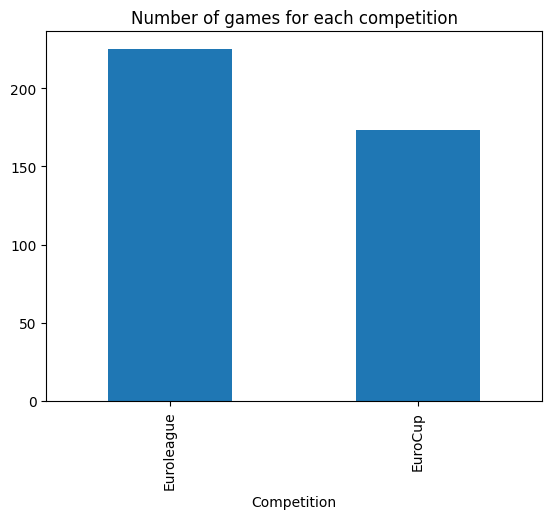

In [4]:
# 1
competition["Competition"].value_counts().plot(kind="bar", title= "Number of games for each competition")

<Axes: xlabel='Competition,Ganador'>

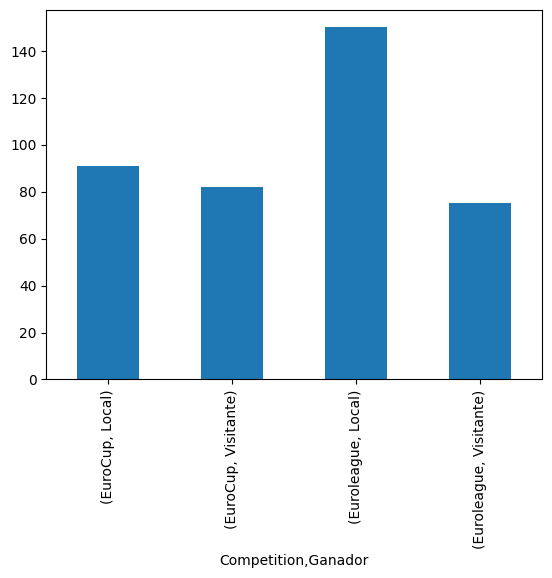

In [5]:
# 2
competition.groupby(["Competition","Ganador"])["Ganador"].count().plot(kind="bar")

<Axes: xlabel='Competition'>

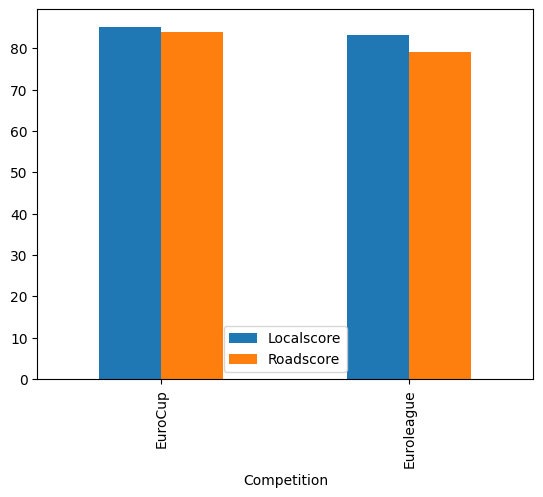

In [6]:
# 3
competition.groupby(["Competition"]).agg({"Localscore":"mean","Roadscore":"mean"}).plot(kind="bar")


<Axes: xlabel='Competition,Ganador'>

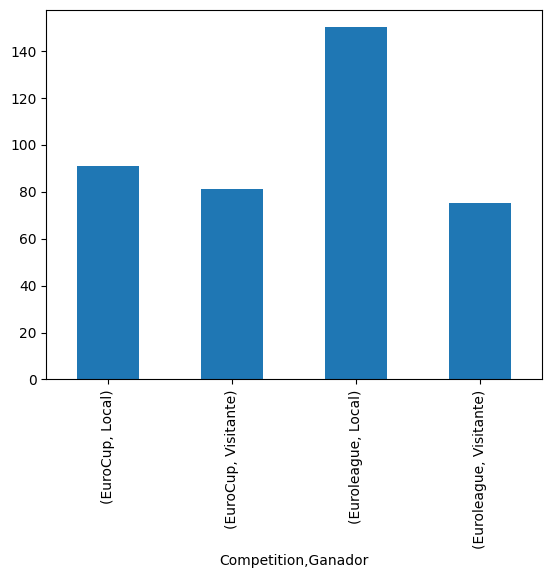

In [7]:
# 4
competition.groupby(["Competition","Ganador"])["Absolut_plusminus"].count().plot(kind="bar")

In [79]:
# 5
competition.groupby(["Competition","Localscore","Roadscore"])["Ganador"].count()

Competition  Localscore  Roadscore
EuroCup      57          75.0         1
             59          61.0         1
             60          98.0         1
             62          63.0         1
             63          65.0         1
                                     ..
Euroleague   106         101.0        1
             107         79.0         1
             109         74.0         1
             112         109.0        1
             130         126.0        1
Name: Ganador, Length: 365, dtype: int64

# More Graphs!

Create one of each of the following graph types, with variables of your choice, and add at least two comments describing something interesting of each graph:

1. Comparison Charts (Barplot, Scatterplot or Countplot)
2. Histogram
3. Stack columns Chart
4. Correlation Matrix/Heatmap
5. Trends (Line Charts)

<Axes: xlabel='Competition', ylabel='count'>

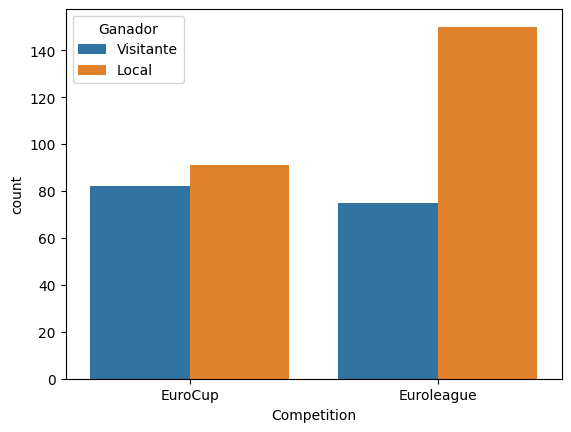

In [32]:
# Comparison Chart
sns.countplot(data=competition,x="Competition",hue="Ganador")



**Your comments here**
- Observamos que en ambas competiciones la tendencia es que gane el equipo local
- En el caso de la Euroleague casi el 100% de las veces gana el equipo local

<Axes: >

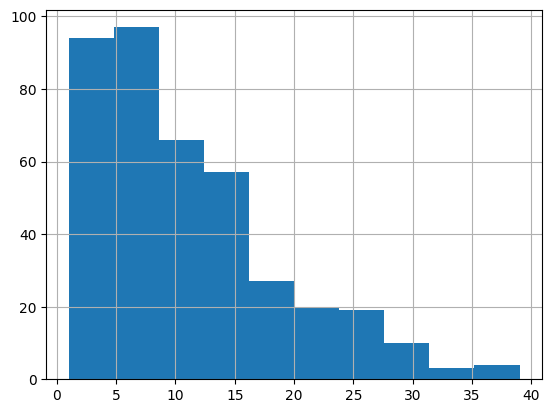

In [33]:
# Histogram
competition["Absolut_plusminus"].hist()

**Your comments here**
- Vemos que la mayoria de partidos se suelen ganar por pocos puntos tal y como se distribuye Absolut plusminus
- Por eso la gran mayoria de partidos se ganan por una diferencia de entre 1 y 8 puntos, siendo el maximo de casi 40 puntos de diferencia

<Axes: xlabel='Ganador', ylabel='Count'>

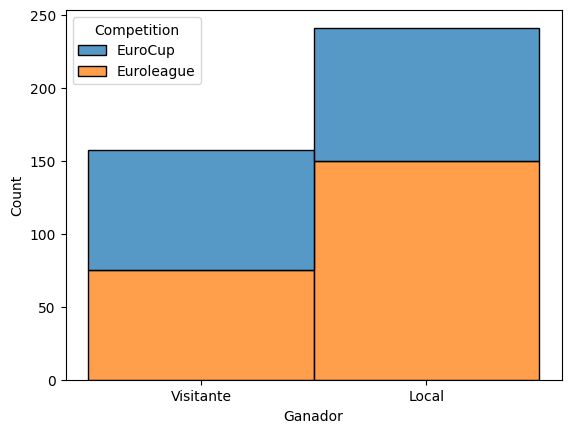

In [66]:
# Stacked columns
sns.histplot(data=competition,x="Ganador",hue="Competition",multiple="stack")


**Your comments here**
- Observamos que en ambas competiciones la tendencia es que gane el equipo local
- Parece que en la Euroleague aun hay as diferencia que en la Eurocup respecto a las victiorias de los locales frente a los visitantes

In [45]:
# Correlation / Heatmap
competition[["Localscore","Roadscore"]].corr()

,Localscore,Roadscore
Localscore,1.000000,0.354323
Roadscore,0.354323,1.000000


**Your comments here**
- ...
- ...

<Axes: xlabel='Ganador', ylabel='Localscore'>

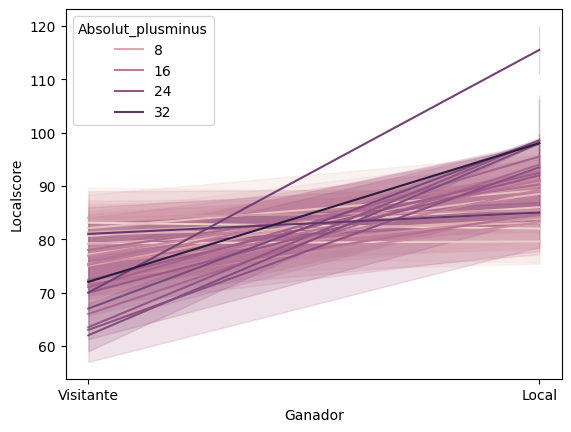

In [69]:
# Trends
sns.lineplot(data=competition,x="Ganador",y="Localscore",hue="Absolut_plusminus")

**Your comments here**
- Este grafico no tiene mucho sentido. Normalmente los line charts se usan para ver correlaciones con distribuciones temporales.
- Teniendo en cuenta los datos que tenemos, son las unicas variables donde he podido sacar el line chart
